In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import streamlit as st
import os

In [2]:
# Charger les données
data_2015 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2015.csv")
data_2016 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2016.csv")
data_2017 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2017.csv")
data_2018 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2018.csv")
data_2019 = pd.read_csv("/Users/skye/folder_happiness_csv/World_Happiness_2019.csv")

In [3]:
# Afficher un aperçu des données
data_2015.head(3)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204

In [4]:
data_2016.head(3)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137

In [5]:
data_2017.head(3)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715

In [6]:
data_2018.head(3)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408

In [7]:
data_2019.head(3)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341

In [8]:
# Renommer les colonnes pour uniformiser
rename_2015 = {
    "Happiness Rank": "Happiness Rank",
    "Happiness Score": "Happiness Score",
    "Economy (GDP per Capita)": "Economy GPD",
    "Health (Life Expectancy)": "Life Expectancy",
    "Trust (Government Corruption)": "Government Corruption",
    "Lower Confidence Interval": "Lower CI",
    "Upper Confidence Interval": "Upper CI",
    "Family": "Social Support",
    "Freedom": "Freedom",
    "Generosity": "Generosity",
    "Dystopia Residual": "Dystopia Residual",
}
rename_2016 = {
    "Happiness Rank": "Happiness Rank",
    "Happiness Score": "Happiness Score",
    "Economy (GDP per Capita)": "Economy GPD",
    "Health (Life Expectancy)": "Life Expectancy",
    "Trust (Government Corruption)": "Government Corruption",
    "Lower Confidence Interval": "Lower CI",
    "Upper Confidence Interval": "Upper CI",
    "Family": "Social Support",
    "Freedom": "Freedom",
    "Generosity": "Generosity",
    "Dystopia Residual": "Dystopia Residual",
}

rename_2017 = {
    "Happiness.Rank":"Happiness Rank",
    "Happiness.Score": "Happiness Score",
    "Economy..GDP.per.Capita.": "Economy GPD",
    "Health..Life.Expectancy.": "Life Expectancy",
    "Trust..Government.Corruption.": "Government Corruption",
    "Family": "Social Support",
    "Dystopia.Residual": "Dystopia Residual",
    "Whisker.high":"Whisker high",
    "Whisker.low":"Whisker low",

}

rename_2018 = {
    "Overall rank": "Happiness Rank",
    "Score": "Happiness Score",
    "GDP per capita": "Economy GPD",
    "Healthy life expectancy": "Life Expectancy",
    "Perceptions of corruption": "Government Corruption",
    "Social support": "Social Support",
    "Freedom to make life choices": "Freedom",
    "Country or region": "Country",
}
rename_2019 = {
    "Overall rank": "Happiness Rank",
    "Score": "Happiness Score",
    "GDP per capita": "Economy GPD",
    "Healthy life expectancy": "Life Expectancy",
    "Perceptions of corruption": "Government Corruption",
    "Social support": "Social Support",
    "Freedom to make life choices": "Freedom",
    "Country or region": "Country",
}

In [9]:
# Appliquer les renommages
data_2015.rename(columns=rename_2015, inplace=True)
data_2016.rename(columns=rename_2016, inplace=True)
data_2017.rename(columns=rename_2017, inplace=True)
data_2018.rename(columns=rename_2018, inplace=True)
data_2019.rename(columns=rename_2019, inplace=True)

In [10]:
data_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy GPD  Social Support  Life Expectancy  Freedom  \
0         0.03411      1.39651         1.34951          0.94143  0.66557   
1         0.04884      1.30232         1.40223          0.94784  0.62877   
2         0.03328      1.32548         1.36058          0.87464  0.64938   
3         0.03880      1.45900         1.33095          0.88521  0.66973   
4         0.03553      1.32629         1.32261          0.90563  0.63297   

   Government Corruption  Generosity  Dystopia Residual  
0                0.41978     0.29678            2.51738  
1                0.14145     0.43630            2.70201  
2                0.48357     0.34139            2.49204  
3                0.36503     0.34699            2.46531  
4                0.32957     0.45811            2.45176

In [11]:
data_2016.head()

Country          Region  Happiness Rank  Happiness Score  Lower CI  \
0      Denmark  Western Europe               1            7.526     7.460   
1  Switzerland  Western Europe               2            7.509     7.428   
2      Iceland  Western Europe               3            7.501     7.333   
3       Norway  Western Europe               4            7.498     7.421   
4      Finland  Western Europe               5            7.413     7.351   

   Upper CI  Economy GPD  Social Support  Life Expectancy  Freedom  \
0     7.592      1.44178         1.16374          0.79504  0.57941   
1     7.590      1.52733         1.14524          0.86303  0.58557   
2     7.669      1.42666         1.18326          0.86733  0.56624   
3     7.575      1.57744         1.12690          0.79579  0.59609   
4     7.475      1.40598         1.13464          0.81091  0.57104   

   Government Corruption  Generosity  Dystopia Residual  
0                0.44453     0.36171            2.73939  
1                0.41203     0.28083            2.69463  
2                0.14975     0.47678            2.83137  
3                0.35776     0.37895            2.66465  
4                0.41004     0.25492            2.82596

In [12]:
data_2017.head()

Country  Happiness Rank  Happiness Score  Whisker high  Whisker low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy GPD  Social Support  Life Expectancy   Freedom  Generosity  \
0     1.616463        1.533524         0.796667  0.635423    0.362012   
1     1.482383        1.551122         0.792566  0.626007    0.355280   
2     1.480633        1.610574         0.833552  0.627163    0.475540   
3     1.564980        1.516912         0.858131  0.620071    0.290549   
4     1.443572        1.540247         0.809158  0.617951    0.245483   

   Government Corruption  Dystopia Residual  
0               0.315964           2.277027  
1               0.400770           2.313707  
2               0.153527           2.322715  
3               0.367007           2.276716  
4               0.382612           2.430182

In [13]:
data_2018.head()

Happiness Rank      Country  Happiness Score  Economy GPD  Social Support  \
0               1      Finland            7.632        1.305           1.592   
1               2       Norway            7.594        1.456           1.582   
2               3      Denmark            7.555        1.351           1.590   
3               4      Iceland            7.495        1.343           1.644   
4               5  Switzerland            7.487        1.420           1.549   

   Life Expectancy  Freedom  Generosity  Government Corruption  
0            0.874    0.681       0.202                  0.393  
1            0.861    0.686       0.286                  0.340  
2            0.868    0.683       0.284                  0.408  
3            0.914    0.677       0.353                  0.138  
4            0.927    0.660       0.256                  0.357

In [14]:
data_2019.head()

Happiness Rank      Country  Happiness Score  Economy GPD  Social Support  \
0               1      Finland            7.769        1.340           1.587   
1               2      Denmark            7.600        1.383           1.573   
2               3       Norway            7.554        1.488           1.582   
3               4      Iceland            7.494        1.380           1.624   
4               5  Netherlands            7.488        1.396           1.522   

   Life Expectancy  Freedom  Generosity  Government Corruption  
0            0.986    0.596       0.153                  0.393  
1            0.996    0.592       0.252                  0.410  
2            1.028    0.603       0.271                  0.341  
3            1.026    0.591       0.354                  0.118  
4            0.999    0.557       0.322                  0.298

In [15]:
# Add a 'Year' column to each dataset
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Find common columns
common_columns = set(data_2015.columns) & set(data_2016.columns) & set(data_2017.columns) & set(data_2018.columns)& set(data_2019.columns)

# Select only the common columns
data_2015_common = data_2015[list(common_columns)]
data_2016_common = data_2016[list(common_columns)]
data_2017_common = data_2017[list(common_columns)]
data_2018_common = data_2018[list(common_columns)]
data_2019_common = data_2019[list(common_columns)]

In [16]:
data_2015_common

Social Support  Happiness Score  Generosity  Economy GPD      Country  \
0           1.34951            7.587     0.29678      1.39651  Switzerland   
1           1.40223            7.561     0.43630      1.30232      Iceland   
2           1.36058            7.527     0.34139      1.32548      Denmark   
3           1.33095            7.522     0.34699      1.45900       Norway   
4           1.32261            7.427     0.45811      1.32629       Canada   
..              ...              ...         ...          ...          ...   
153         0.77370            3.465     0.22628      0.22208       Rwanda   
154         0.35386            3.340     0.18260      0.28665        Benin   
155         0.47489            3.006     0.47179      0.66320        Syria   
156         0.41587            2.905     0.19727      0.01530      Burundi   
157         0.13995            2.839     0.16681      0.20868         Togo   

     Freedom  Happiness Rank  Year  Government Corruption  Life Expectancy  
0    0.66557               1  2015                0.41978          0.94143  
1    0.62877               2  2015                0.14145          0.94784  
2    0.64938               3  2015                0.48357          0.87464  
3    0.66973               4  2015                0.36503          0.88521  
4    0.63297               5  2015                0.32957          0.90563  
..       ...             ...   ...                    ...              ...  
153  0.59201             154  2015                0.55191          0.42864  
154  0.48450             155  2015                0.08010          0.31910  
155  0.15684             156  2015                0.18906          0.72193  
156  0.11850             157  2015                0.10062          0.22396  
157  0.36453             158  2015                0.10731          0.28443  

[158 rows x 10 columns]

In [17]:
data_2016_common

Social Support  Happiness Score  Generosity  Economy GPD      Country  \
0           1.16374            7.526     0.36171      1.44178      Denmark   
1           1.14524            7.509     0.28083      1.52733  Switzerland   
2           1.18326            7.501     0.47678      1.42666      Iceland   
3           1.12690            7.498     0.37895      1.57744       Norway   
4           1.13464            7.413     0.25492      1.40598      Finland   
..              ...              ...         ...          ...          ...   
152         0.10419            3.484     0.20180      0.39499        Benin   
153         0.11037            3.360     0.31268      0.38227  Afghanistan   
154         0.00000            3.303     0.17517      0.28123         Togo   
155         0.14866            3.069     0.48397      0.74719        Syria   
156         0.23442            2.905     0.20290      0.06831      Burundi   

     Freedom  Happiness Rank  Year  Government Corruption  Life Expectancy  
0    0.57941               1  2016                0.44453          0.79504  
1    0.58557               2  2016                0.41203          0.86303  
2    0.56624               3  2016                0.14975          0.86733  
3    0.59609               4  2016                0.35776          0.79579  
4    0.57104               5  2016                0.41004          0.81091  
..       ...             ...   ...                    ...              ...  
152  0.39747             153  2016                0.06681          0.21028  
153  0.16430             154  2016                0.07112          0.17344  
154  0.34678             155  2016                0.11587          0.24811  
155  0.06912             156  2016                0.17233          0.62994  
156  0.04320             157  2016                0.09419          0.15747  

[157 rows x 10 columns]

In [18]:
data_2017_common

Social Support  Happiness Score  Generosity  Economy GPD  \
0          1.533524            7.537    0.362012     1.616463   
1          1.551122            7.522    0.355280     1.482383   
2          1.610574            7.504    0.475540     1.480633   
3          1.516912            7.494    0.290549     1.564980   
4          1.540247            7.469    0.245483     1.443572   
..              ...              ...         ...          ...   
150        0.945707            3.471    0.252756     0.368746   
151        0.396103            3.462    0.493664     0.777153   
152        1.041990            3.349    0.354256     0.511136   
153        0.629794            2.905    0.204435     0.091623   
154        0.000000            2.693    0.280876     0.000000   

                      Country   Freedom  Happiness Rank  Year  \
0                      Norway  0.635423               1  2017   
1                     Denmark  0.626007               2  2017   
2                     Iceland  0.627163               3  2017   
3                 Switzerland  0.620071               4  2017   
4                     Finland  0.617951               5  2017   
..                        ...       ...             ...   ...   
150                    Rwanda  0.581844             151  2017   
151                     Syria  0.081539             152  2017   
152                  Tanzania  0.390018             153  2017   
153                   Burundi  0.059901             154  2017   
154  Central African Republic  0.270842             155  2017   

     Government Corruption  Life Expectancy  
0                 0.315964         0.796667  
1                 0.400770         0.792566  
2                 0.153527         0.833552  
3                 0.367007         0.858131  
4                 0.382612         0.809158  
..                     ...              ...  
150               0.455220         0.326425  
151               0.151347         0.500533  
152               0.066035         0.364509  
153               0.084148         0.151611  
154               0.056565         0.018773  

[155 rows x 10 columns]

In [19]:
data_2018_common

Social Support  Happiness Score  Generosity  Economy GPD  \
0             1.592            7.632       0.202        1.305   
1             1.582            7.594       0.286        1.456   
2             1.590            7.555       0.284        1.351   
3             1.644            7.495       0.353        1.343   
4             1.549            7.487       0.256        1.420   
..              ...              ...         ...          ...   
151           1.073            3.355       0.083        0.442   
152           0.991            3.303       0.270        0.455   
153           0.608            3.254       0.224        0.337   
154           0.000            3.083       0.218        0.024   
155           0.627            2.905       0.149        0.091   

                      Country  Freedom  Happiness Rank  Year  \
0                     Finland    0.681               1  2018   
1                      Norway    0.686               2  2018   
2                     Denmark    0.683               3  2018   
3                     Iceland    0.677               4  2018   
4                 Switzerland    0.660               5  2018   
..                        ...      ...             ...   ...   
151                     Yemen    0.244             152  2018   
152                  Tanzania    0.481             153  2018   
153               South Sudan    0.112             154  2018   
154  Central African Republic    0.305             155  2018   
155                   Burundi    0.065             156  2018   

     Government Corruption  Life Expectancy  
0                    0.393            0.874  
1                    0.340            0.861  
2                    0.408            0.868  
3                    0.138            0.914  
4                    0.357            0.927  
..                     ...              ...  
151                  0.064            0.343  
152                  0.097            0.381  
153                  0.106            0.177  
154                  0.038            0.010  
155                  0.076            0.145  

[156 rows x 10 columns]

In [20]:
data_2019_common

Social Support  Happiness Score  Generosity  Economy GPD  \
0             1.587            7.769       0.153        1.340   
1             1.573            7.600       0.252        1.383   
2             1.582            7.554       0.271        1.488   
3             1.624            7.494       0.354        1.380   
4             1.522            7.488       0.322        1.396   
..              ...              ...         ...          ...   
151           0.711            3.334       0.217        0.359   
152           0.885            3.231       0.276        0.476   
153           0.517            3.203       0.158        0.350   
154           0.000            3.083       0.235        0.026   
155           0.575            2.853       0.202        0.306   

                      Country  Freedom  Happiness Rank  Year  \
0                     Finland    0.596               1  2019   
1                     Denmark    0.592               2  2019   
2                      Norway    0.603               3  2019   
3                     Iceland    0.591               4  2019   
4                 Netherlands    0.557               5  2019   
..                        ...      ...             ...   ...   
151                    Rwanda    0.555             152  2019   
152                  Tanzania    0.417             153  2019   
153               Afghanistan    0.000             154  2019   
154  Central African Republic    0.225             155  2019   
155               South Sudan    0.010             156  2019   

     Government Corruption  Life Expectancy  
0                    0.393            0.986  
1                    0.410            0.996  
2                    0.341            1.028  
3                    0.118            1.026  
4                    0.298            0.999  
..                     ...              ...  
151                  0.411            0.614  
152                  0.147            0.499  
153                  0.025            0.361  
154                  0.035            0.105  
155                  0.091            0.295  

[156 rows x 10 columns]

In [21]:
# Combine the datasets
combined_data = pd.concat([data_2015_common, data_2016_common, data_2017_common, data_2018_common, data_2019_common], ignore_index=True)

# Check the combined data
print(combined_data.head())

   Social Support  Happiness Score  Generosity  Economy GPD      Country  \
0         1.34951            7.587     0.29678      1.39651  Switzerland   
1         1.40223            7.561     0.43630      1.30232      Iceland   
2         1.36058            7.527     0.34139      1.32548      Denmark   
3         1.33095            7.522     0.34699      1.45900       Norway   
4         1.32261            7.427     0.45811      1.32629       Canada   

   Freedom  Happiness Rank  Year  Government Corruption  Life Expectancy  
0  0.66557               1  2015                0.41978          0.94143  
1  0.62877               2  2015                0.14145          0.94784  
2  0.64938               3  2015                0.48357          0.87464  
3  0.66973               4  2015                0.36503          0.88521  
4  0.63297               5  2015                0.32957          0.90563  


In [22]:
# Check the combined data
combined_data.head()

Social Support  Happiness Score  Generosity  Economy GPD      Country  \
0         1.34951            7.587     0.29678      1.39651  Switzerland   
1         1.40223            7.561     0.43630      1.30232      Iceland   
2         1.36058            7.527     0.34139      1.32548      Denmark   
3         1.33095            7.522     0.34699      1.45900       Norway   
4         1.32261            7.427     0.45811      1.32629       Canada   

   Freedom  Happiness Rank  Year  Government Corruption  Life Expectancy  
0  0.66557               1  2015                0.41978          0.94143  
1  0.62877               2  2015                0.14145          0.94784  
2  0.64938               3  2015                0.48357          0.87464  
3  0.66973               4  2015                0.36503          0.88521  
4  0.63297               5  2015                0.32957          0.90563

In [23]:
combined_data.tail()

Social Support  Happiness Score  Generosity  Economy GPD  \
777           0.711            3.334       0.217        0.359   
778           0.885            3.231       0.276        0.476   
779           0.517            3.203       0.158        0.350   
780           0.000            3.083       0.235        0.026   
781           0.575            2.853       0.202        0.306   

                      Country  Freedom  Happiness Rank  Year  \
777                    Rwanda    0.555             152  2019   
778                  Tanzania    0.417             153  2019   
779               Afghanistan    0.000             154  2019   
780  Central African Republic    0.225             155  2019   
781               South Sudan    0.010             156  2019   

     Government Corruption  Life Expectancy  
777                  0.411            0.614  
778                  0.147            0.499  
779                  0.025            0.361  
780                  0.035            0.105  
781                  0.091            0.295

In [24]:
# Group by year and calculate mean only for numeric columns
yearly_summary = combined_data.groupby('Year').mean(numeric_only=True)
print(yearly_summary)

      Social Support  Happiness Score  Generosity  Economy GPD   Freedom  \
Year                                                                       
2015        0.991046         5.375734    0.237296     0.846137  0.428615   
2016        0.793621         5.382185    0.242635     0.953880  0.370994   
2017        1.188898         5.354019    0.246883     0.984718  0.408786   
2018        1.213237         5.375917    0.181006     0.891449  0.454506   
2019        1.208814         5.407096    0.184846     0.905147  0.392571   

      Happiness Rank  Government Corruption  Life Expectancy  
Year                                                          
2015       79.493671               0.143422         0.630259  
2016       78.980892               0.137624         0.557619  
2017       78.000000               0.123120         0.551341  
2018       78.500000               0.112000         0.597346  
2019       78.500000               0.110603         0.725244  


In [25]:
# Compare GDP and Life Expectancy across years
comparison = combined_data.groupby('Year')[['Economy GPD', 'Life Expectancy']].mean()
print(comparison)

      Economy GPD  Life Expectancy
Year                              
2015     0.846137         0.630259
2016     0.953880         0.557619
2017     0.984718         0.551341
2018     0.891449         0.597346
2019     0.905147         0.725244


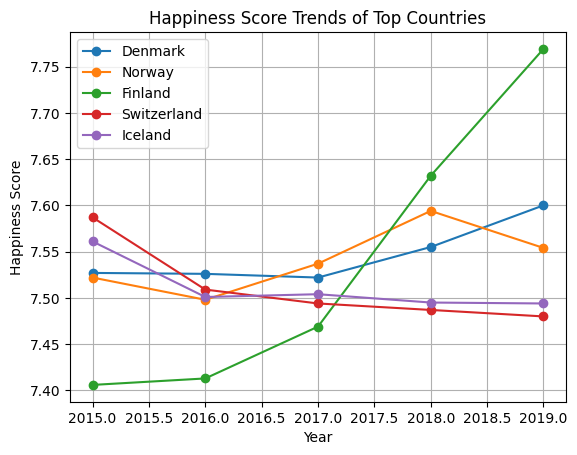

In [26]:
import matplotlib.pyplot as plt

# Group by 'Country' and calculate the average Happiness Score
country_avg_happiness = combined_data.groupby('Country')['Happiness Score'].mean()

# Sort countries by Happiness Score in descending order and get the top 5
top_countries = country_avg_happiness.sort_values(ascending=False).head(5).index.tolist()

# Filter the data for the top countries
filtered_data = combined_data[combined_data['Country'].isin(top_countries)]

# Use .loc to safely modify the columns
filtered_data.loc[:, 'Year'] = pd.to_numeric(filtered_data['Year'], errors='coerce')
filtered_data.loc[:, 'Happiness Score'] = pd.to_numeric(filtered_data['Happiness Score'], errors='coerce')

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['Year', 'Happiness Score'])

# Plot Happiness Score trends for the top countries
for country in top_countries:
    country_data = filtered_data[filtered_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['Happiness Score'], marker='o', label=country)

plt.title('Happiness Score Trends of Top Countries')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(True)
plt.show()


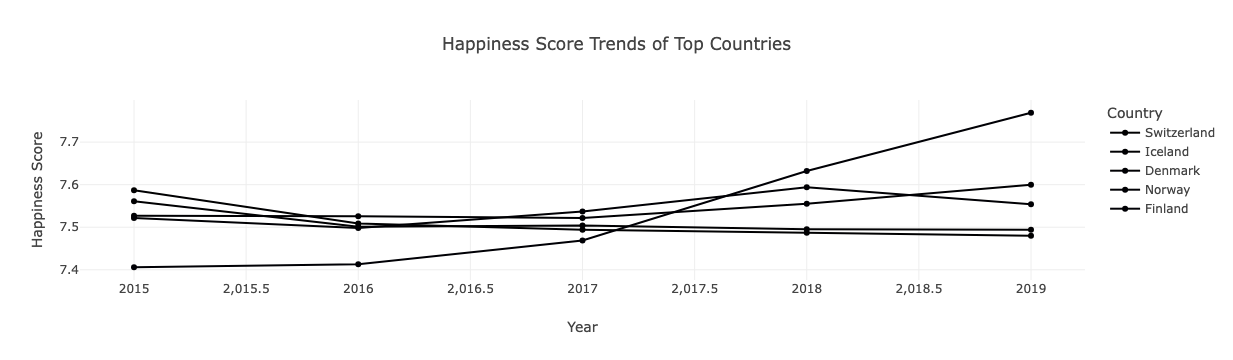

In [27]:
import plotly.express as px

# Group by 'Country' and calculate the average Happiness Score
country_avg_happiness = combined_data.groupby('Country')['Happiness Score'].mean()

# Sort countries by Happiness Score in descending order and get the top 5
top_countries = country_avg_happiness.sort_values(ascending=False).head(5).index.tolist()

# Filter the data for the top countries
filtered_data = combined_data[combined_data['Country'].isin(top_countries)]

# Use .loc to safely modify the columns
filtered_data.loc[:, 'Year'] = pd.to_numeric(filtered_data['Year'], errors='coerce')
filtered_data.loc[:, 'Happiness Score'] = pd.to_numeric(filtered_data['Happiness Score'], errors='coerce')

# Remove rows with missing values
filtered_data = filtered_data.dropna(subset=['Year', 'Happiness Score'])

# Plot Happiness Score trends for the top countries
fig = px.line(filtered_data, x='Year', y='Happiness Score', color='Country', markers=True,
              title='Happiness Score Trends of Top Countries')

# Show the plot
fig.show()

In [28]:
combined_data.to_csv('combined_data.csv', index=False)

In [29]:
data = pd.read_csv("combined_data.csv")
data

Social Support  Happiness Score  Generosity  Economy GPD  \
0           1.34951            7.587     0.29678      1.39651   
1           1.40223            7.561     0.43630      1.30232   
2           1.36058            7.527     0.34139      1.32548   
3           1.33095            7.522     0.34699      1.45900   
4           1.32261            7.427     0.45811      1.32629   
..              ...              ...         ...          ...   
777         0.71100            3.334     0.21700      0.35900   
778         0.88500            3.231     0.27600      0.47600   
779         0.51700            3.203     0.15800      0.35000   
780         0.00000            3.083     0.23500      0.02600   
781         0.57500            2.853     0.20200      0.30600   

                      Country  Freedom  Happiness Rank  Year  \
0                 Switzerland  0.66557               1  2015   
1                     Iceland  0.62877               2  2015   
2                     Denmark  0.64938               3  2015   
3                      Norway  0.66973               4  2015   
4                      Canada  0.63297               5  2015   
..                        ...      ...             ...   ...   
777                    Rwanda  0.55500             152  2019   
778                  Tanzania  0.41700             153  2019   
779               Afghanistan  0.00000             154  2019   
780  Central African Republic  0.22500             155  2019   
781               South Sudan  0.01000             156  2019   

     Government Corruption  Life Expectancy  
0                  0.41978          0.94143  
1                  0.14145          0.94784  
2                  0.48357          0.87464  
3                  0.36503          0.88521  
4                  0.32957          0.90563  
..                     ...              ...  
777                0.41100          0.61400  
778                0.14700          0.49900  
779                0.02500          0.36100  
780                0.03500          0.10500  
781                0.09100          0.29500  

[782 rows x 10 columns]

In [30]:
# Display the first few rows of the dataset
data.head()

Social Support  Happiness Score  Generosity  Economy GPD      Country  \
0         1.34951            7.587     0.29678      1.39651  Switzerland   
1         1.40223            7.561     0.43630      1.30232      Iceland   
2         1.36058            7.527     0.34139      1.32548      Denmark   
3         1.33095            7.522     0.34699      1.45900       Norway   
4         1.32261            7.427     0.45811      1.32629       Canada   

   Freedom  Happiness Rank  Year  Government Corruption  Life Expectancy  
0  0.66557               1  2015                0.41978          0.94143  
1  0.62877               2  2015                0.14145          0.94784  
2  0.64938               3  2015                0.48357          0.87464  
3  0.66973               4  2015                0.36503          0.88521  
4  0.63297               5  2015                0.32957          0.90563

In [31]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Social Support         782 non-null    float64
 1   Happiness Score        782 non-null    float64
 2   Generosity             782 non-null    float64
 3   Economy GPD            782 non-null    float64
 4   Country                782 non-null    object 
 5   Freedom                782 non-null    float64
 6   Happiness Rank         782 non-null    int64  
 7   Year                   782 non-null    int64  
 8   Government Corruption  781 non-null    float64
 9   Life Expectancy        782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [32]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Social Support           0
Happiness Score          0
Generosity               0
Economy GPD              0
Country                  0
Freedom                  0
Happiness Rank           0
Year                     0
Government Corruption    1
Life Expectancy          0
dtype: int64

In [33]:
# Remove rows with missing values in 'Government Corruption'
data = data.dropna(subset=['Government Corruption'])

# Verify that the missing value is removed
missing_values_cleaned = data.isnull().sum()
print(missing_values_cleaned)

Social Support           0
Happiness Score          0
Generosity               0
Economy GPD              0
Country                  0
Freedom                  0
Happiness Rank           0
Year                     0
Government Corruption    0
Life Expectancy          0
dtype: int64


In [34]:
# Check unique years in the dataset
print(data['Year'].unique())


[2015 2016 2017 2018 2019]


In [35]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       Social Support  Happiness Score  Generosity  Economy GPD     Freedom  \
count      781.000000       781.000000  781.000000   781.000000  781.000000   
mean         1.078780         5.377232    0.218618     0.914537    0.411254   
std          0.329581         1.127071    0.122394     0.405403    0.152911   
min          0.000000         2.693000    0.000000     0.000000    0.000000   
25%          0.870210         4.509000    0.130000     0.605000    0.310480   
50%          1.125000         5.321000    0.202000     0.982000    0.431000   
75%          1.328000         6.182000    0.279060     1.233748    0.531000   
max          1.644000         7.769000    0.838075     1.870766    0.724000   

       Happiness Rank         Year  Government Corruption  Life Expectancy  
count      781.000000   781.000000             781.000000       781.000000  
mean        78.773367  2016.992318               0.125436         0.612342  
std         45.162398     1.41781

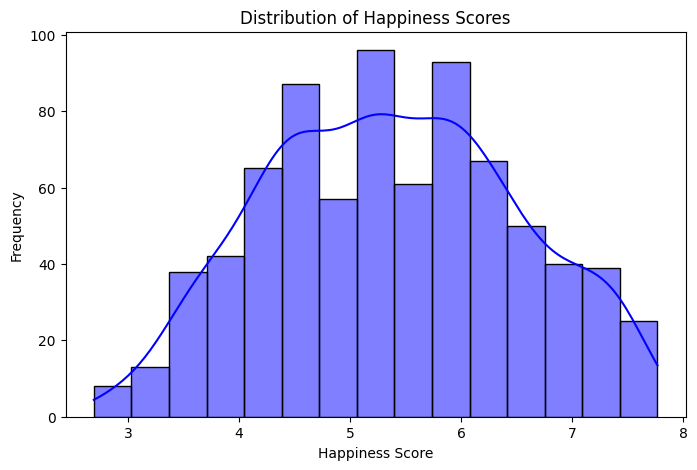

In [36]:

# 2. Distribution of Happiness Score
plt.figure(figsize=(8, 5))
sns.histplot(data['Happiness Score'], kde=True, bins=15, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()


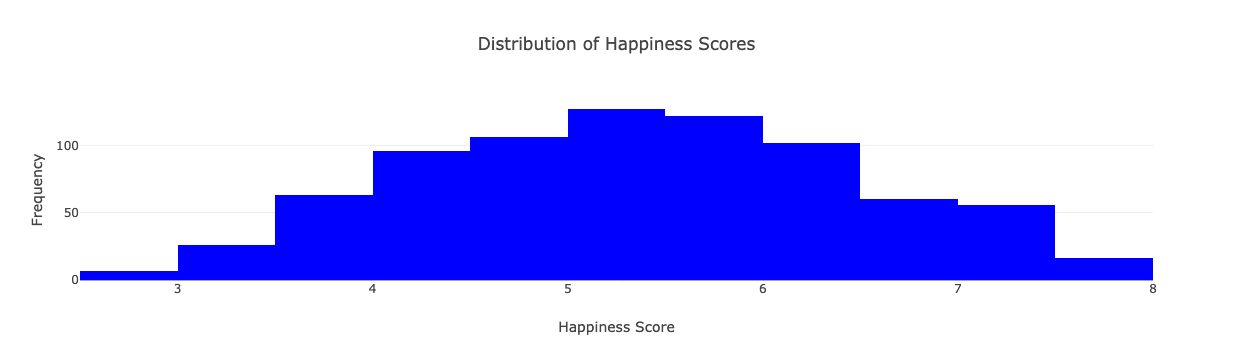

In [37]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Distribution of Happiness Scores
fig1 = px.histogram(data, x='Happiness Score', nbins=15, title='Distribution of Happiness Scores', 
                    labels={'Happiness Score': 'Happiness Score'}, color_discrete_sequence=['blue'])
fig1.update_layout(xaxis_title='Happiness Score', yaxis_title='Frequency')
fig1.show()


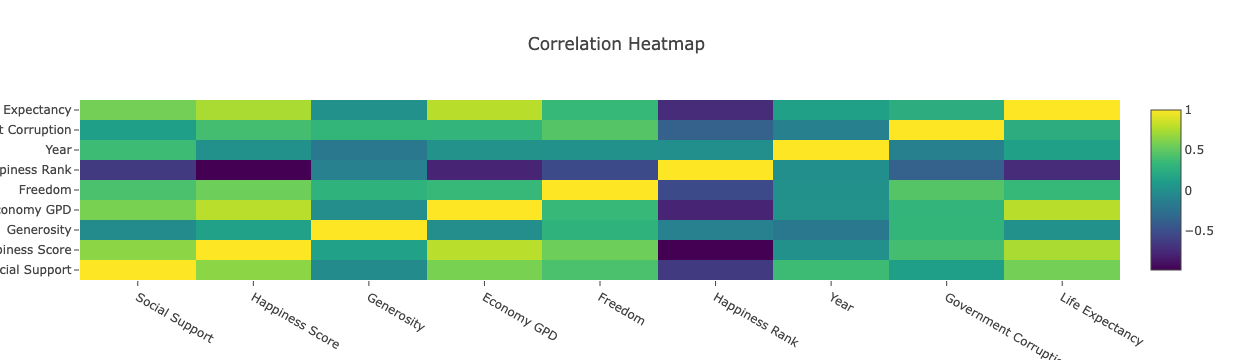

In [38]:

# 2. Correlation Heatmap
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis'
))
heatmap.update_layout(title="Correlation Heatmap")
heatmap.show()


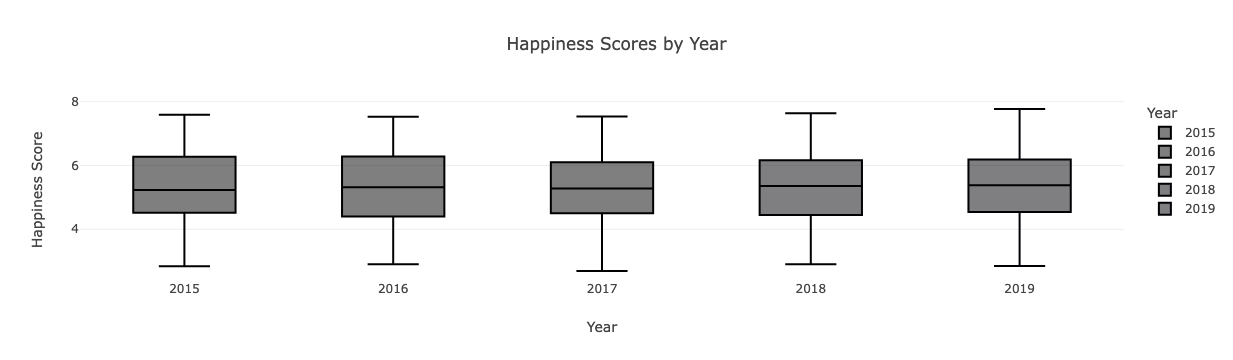

In [39]:

# 3. Happiness Score by Year (Boxplot)
fig2 = px.box(data, x='Year', y='Happiness Score', color='Year', 
              title='Happiness Scores by Year', 
              labels={'Happiness Score': 'Happiness Score', 'Year': 'Year'})
fig2.update_layout(xaxis_title='Year', yaxis_title='Happiness Score')
fig2.show()


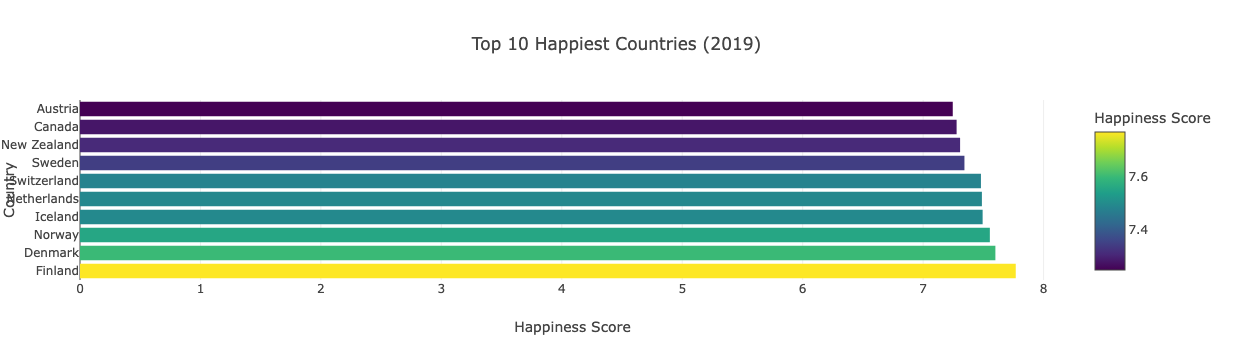

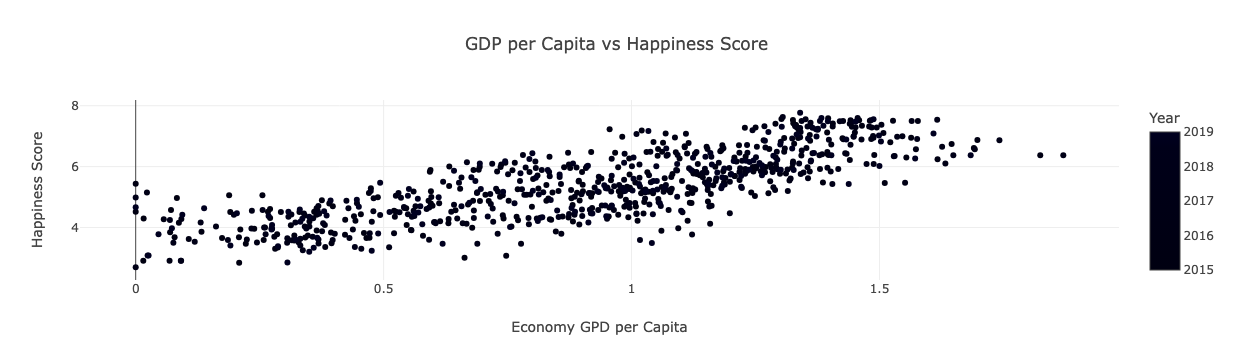

In [40]:

# 4. Top 10 Happiest Countries (Latest Year)
latest_year = data['Year'].max()
top_10 = data[data['Year'] == latest_year].sort_values(by='Happiness Score', ascending=False).head(10)
fig3 = px.bar(top_10, x='Happiness Score', y='Country', orientation='h', 
              title=f"Top 10 Happiest Countries ({latest_year})", 
              labels={'Happiness Score': 'Happiness Score', 'Country': 'Country'}, 
              color='Happiness Score', color_continuous_scale='viridis')
fig3.update_layout(xaxis_title='Happiness Score', yaxis_title='Country')
fig3.show()

# 5. Relationship Between GDP and Happiness Score
fig4 = px.scatter(data, x='Economy GPD', y='Happiness Score', color='Year', 
                  title='GDP per Capita vs Happiness Score', 
                  labels={'Economy GPD': 'Economy GPD per Capita', 'Happiness Score': 'Happiness Score'},
                  hover_data=['Country'])
fig4.update_layout(xaxis_title='Economy GPD per Capita', yaxis_title='Happiness Score')
fig4.show()


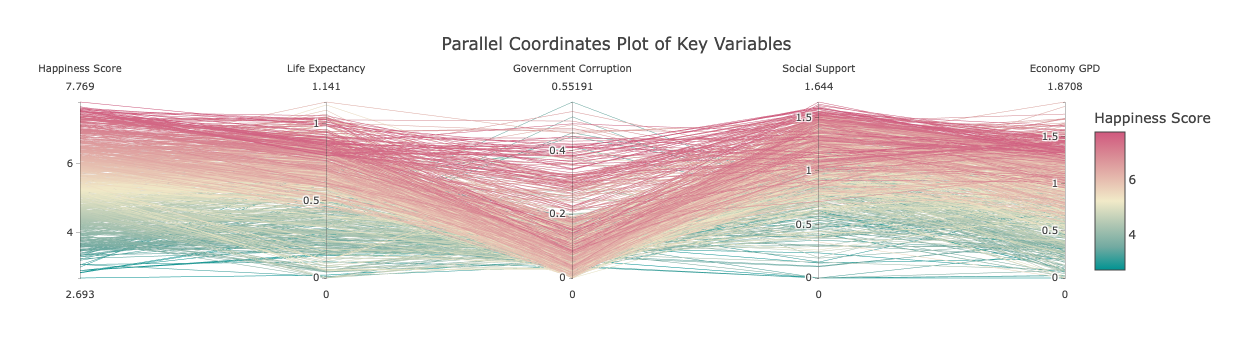

In [41]:

# 5. Parallel Coordinates Plot of Key Variables
key_variables = ['Happiness Score', 'Life Expectancy', 'Government Corruption', 'Social Support', 'Economy GPD']
fig5 = px.parallel_coordinates(data, dimensions=key_variables, 
                                color='Happiness Score', color_continuous_scale=px.colors.diverging.Tealrose, 
                                title="Parallel Coordinates Plot of Key Variables")
fig5.show()


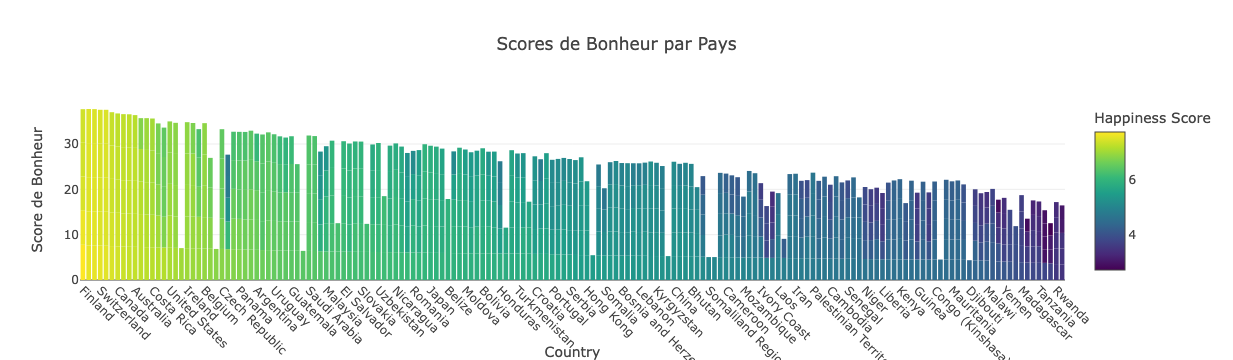

In [42]:
# Sort data by Happiness Score in descending order
data_sorted = data.sort_values('Happiness Score', ascending=False)

# Create the bar chart with color
fig4 = px.bar(data_sorted,
              x='Country', 
              y='Happiness Score', 
              color='Happiness Score',  # Color by Happiness Score
              title='Scores de Bonheur par Pays',
              color_continuous_scale='Viridis')  # Choose a color scale

# Update layout for better visualization
fig4.update_layout(yaxis_title='Score de Bonheur',
                   xaxis_tickangle=45)  # Rotate country labels for readability
fig4.show()

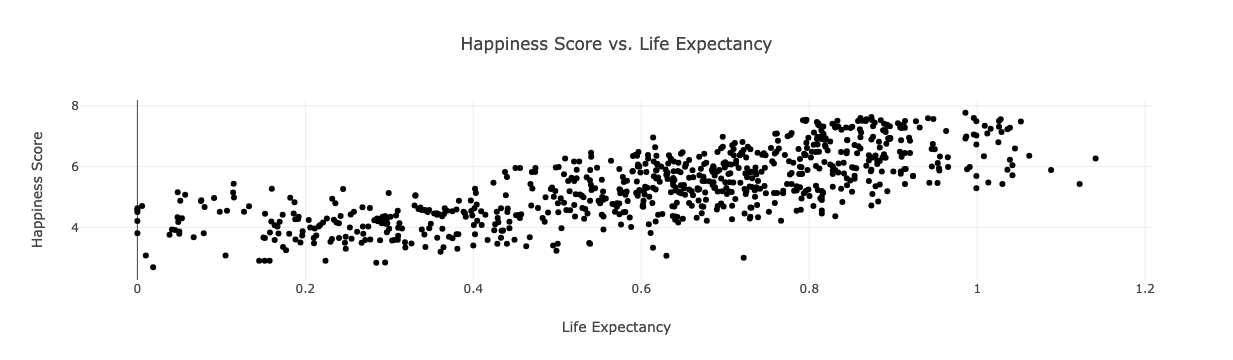

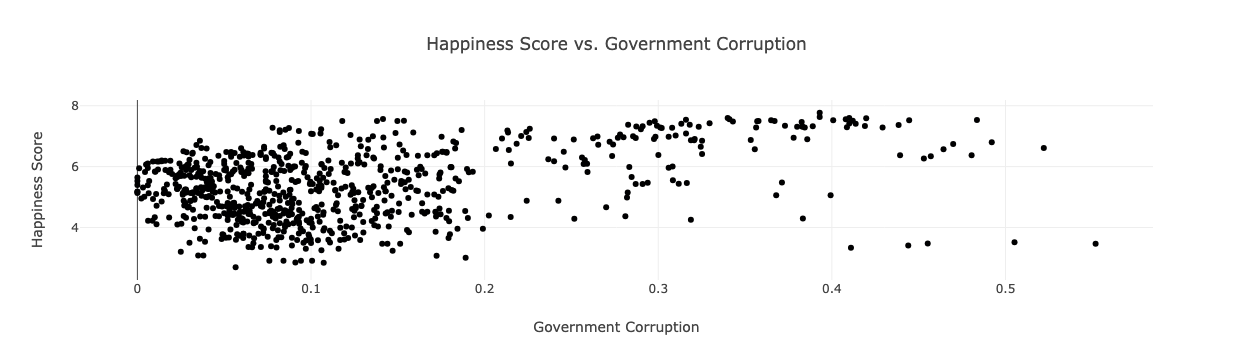

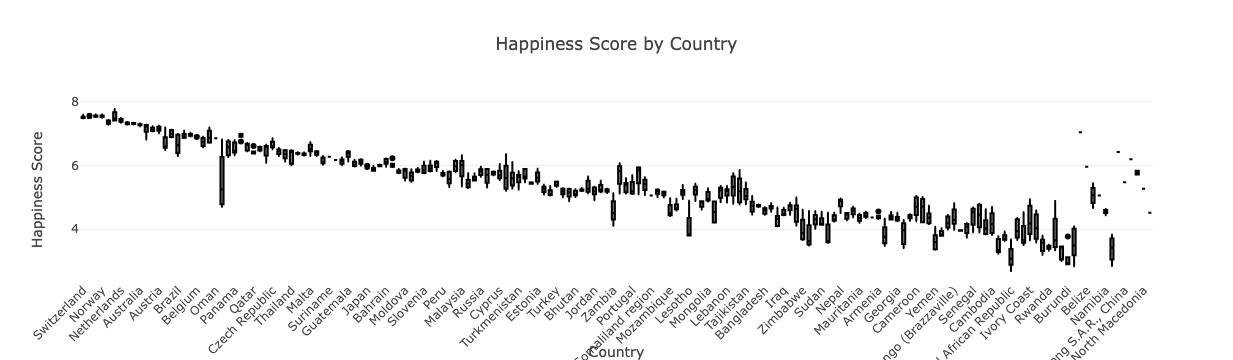

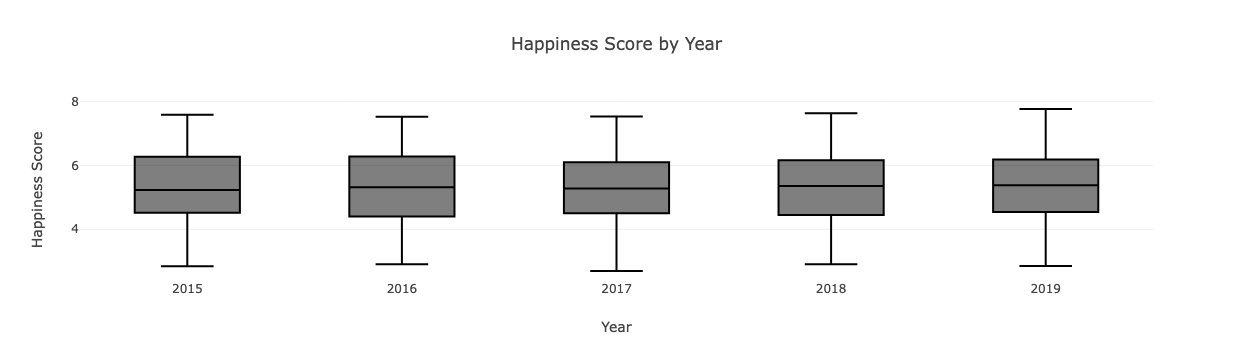

In [43]:
import plotly.express as px
import pandas as pd

# Scatter Plot: Happiness Score vs. Life Expectancy
fig1 = px.scatter(data, x='Life Expectancy', y='Happiness Score',
                  title='Happiness Score vs. Life Expectancy',
                  labels={'Life Expectancy': 'Life Expectancy', 'Happiness Score': 'Happiness Score'},
                  hover_name='Country')  # Show country name on hover
fig1.show()

# Scatter Plot: Happiness Score vs. Government Corruption
fig2 = px.scatter(data, x='Government Corruption', y='Happiness Score',
                  title='Happiness Score vs. Government Corruption',
                  labels={'Government Corruption': 'Government Corruption', 'Happiness Score': 'Happiness Score'},
                  hover_name='Country')  # Show country name on hover
fig2.show()

# Box Plot: Happiness Score by Country
fig3 = px.box(data, x='Country', y='Happiness Score',
              title='Happiness Score by Country',
              labels={'Country': 'Country', 'Happiness Score': 'Happiness Score'})
fig3.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig3.show()

# Box Plot: Happiness Score by Year
fig4 = px.box(data, x='Year', y='Happiness Score',
              title='Happiness Score by Year',
              labels={'Year': 'Year', 'Happiness Score': 'Happiness Score'})
fig4.show()


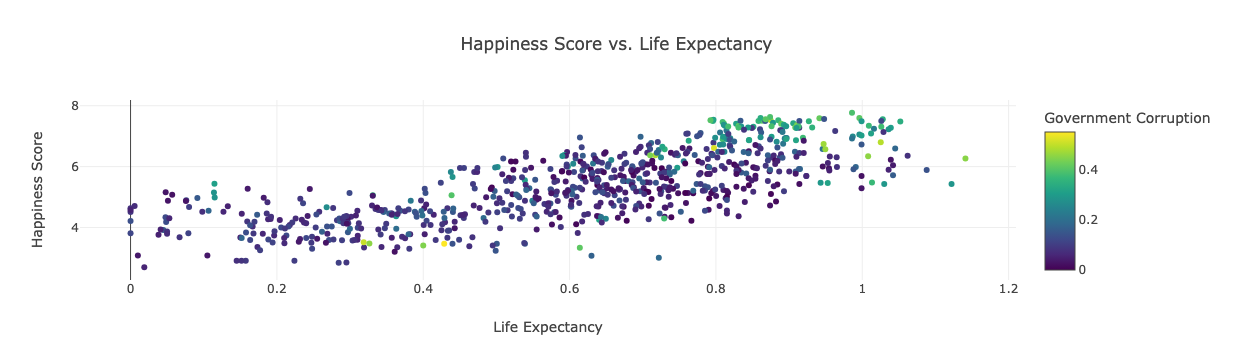

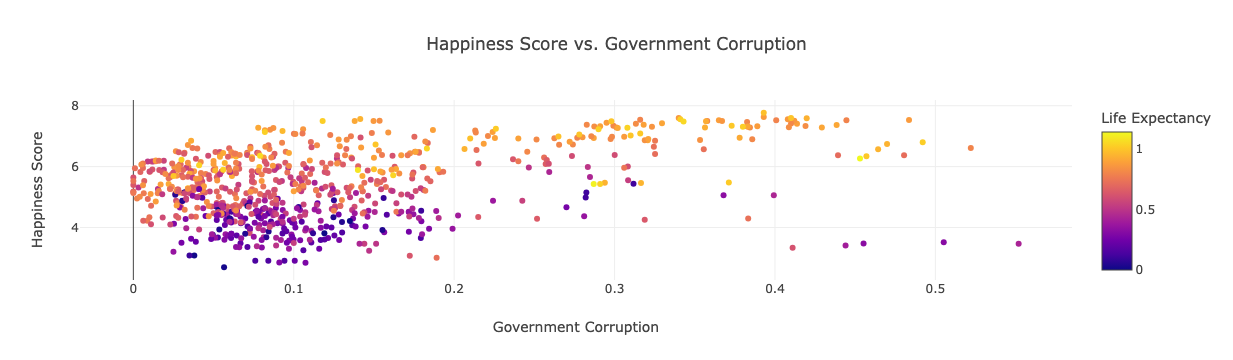

In [44]:

# Scatter Plot: Happiness Score vs. Life Expectancy with color by Government Corruption
fig1 = px.scatter(
    data, x='Life Expectancy', y='Happiness Score', color='Government Corruption',
    title='Happiness Score vs. Life Expectancy',
    labels={'Life Expectancy': 'Life Expectancy', 'Happiness Score': 'Happiness Score', 'Government Corruption': 'Government Corruption'},
    hover_name='Country',
    color_continuous_scale='Viridis'  # Optional: Change color scale
)
fig1.show()

# Scatter Plot: Happiness Score vs. Government Corruption with color by Life Expectancy
fig2 = px.scatter(
    data, x='Government Corruption', y='Happiness Score', color='Life Expectancy',
    title='Happiness Score vs. Government Corruption',
    labels={'Government Corruption': 'Government Corruption', 'Happiness Score': 'Happiness Score', 'Life Expectancy': 'Life Expectancy'},
    hover_name='Country',
    color_continuous_scale='Plasma'  # Optional: Change color scale
)
fig2.show()



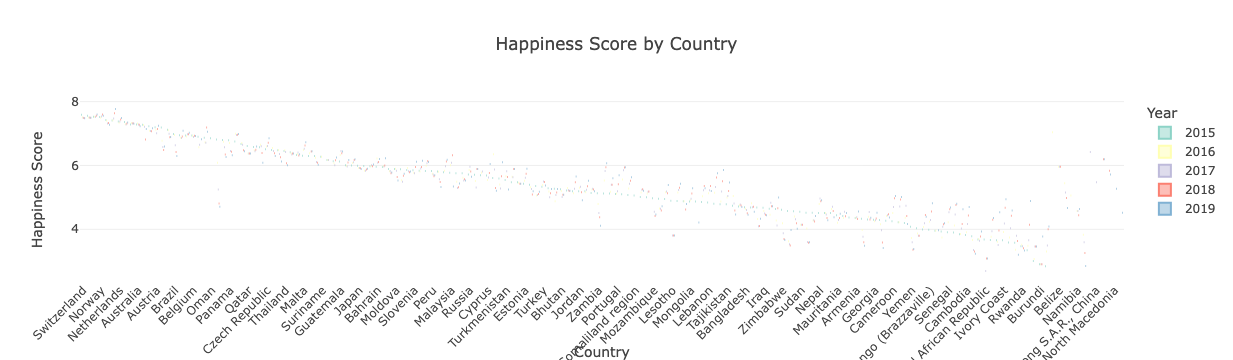

In [45]:
import plotly.express as px

# Box Plot: Happiness Score by Country with color by Year (discrete colors)
fig3 = px.box(
    data, x='Country', y='Happiness Score', color='Year',
    title='Happiness Score by Country',
    labels={'Country': 'Country', 'Happiness Score': 'Happiness Score'},
    color_discrete_sequence=px.colors.qualitative.Set3  # Set3 for distinct colors
)
fig3.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better visibility
fig3.show()


In [46]:
import plotly.express as px
from ipywidgets import widgets, interact

# Interactive function for year selection
def update_map(year):
    # Filter data for the selected year
    filtered_data = data[data['Year'] == year]
    
    # Create the choropleth map
    fig = px.choropleth(
        filtered_data,
        locations="Country",
        locationmode="country names",
        color="Happiness Score",
        hover_name="Country",
        color_continuous_scale="Blues",
        title=f"Happiness Score Across Countries in {year}"
    )
    
    # Show the map
    fig.show()

# Dropdown widget for year selection
year_selector = widgets.IntSlider(
    value=data['Year'].min(),
    min=data['Year'].min(),
    max=data['Year'].max(),
    step=1,
    description="Year:"
)

# Create an interactive map
interact(update_map, year=year_selector)


interactive(children=(IntSlider(value=2015, description='Year:', max=2019, min=2015), Output()), _dom_classes=…

<function __main__.update_map(year)>

In [47]:
data.to_csv('data.csv', index=False)

In [48]:
# Checking for missing values, data types, and summary statistics

# Missing values
missing_values = data.isnull().sum()

# Data types
data_types = data.dtypes

# Summary statistics
summary_stats = data.describe()

missing_values, data_types, summary_stats


(Social Support           0
 Happiness Score          0
 Generosity               0
 Economy GPD              0
 Country                  0
 Freedom                  0
 Happiness Rank           0
 Year                     0
 Government Corruption    0
 Life Expectancy          0
 dtype: int64,
 Social Support           float64
 Happiness Score          float64
 Generosity               float64
 Economy GPD              float64
 Country                   object
 Freedom                  float64
 Happiness Rank             int64
 Year                       int64
 Government Corruption    float64
 Life Expectancy          float64
 dtype: object,
        Social Support  Happiness Score  Generosity  Economy GPD     Freedom  \
 count      781.000000       781.000000  781.000000   781.000000  781.000000   
 mean         1.078780         5.377232    0.218618     0.914537    0.411254   
 std          0.329581         1.127071    0.122394     0.405403    0.152911   
 min          0.000000       

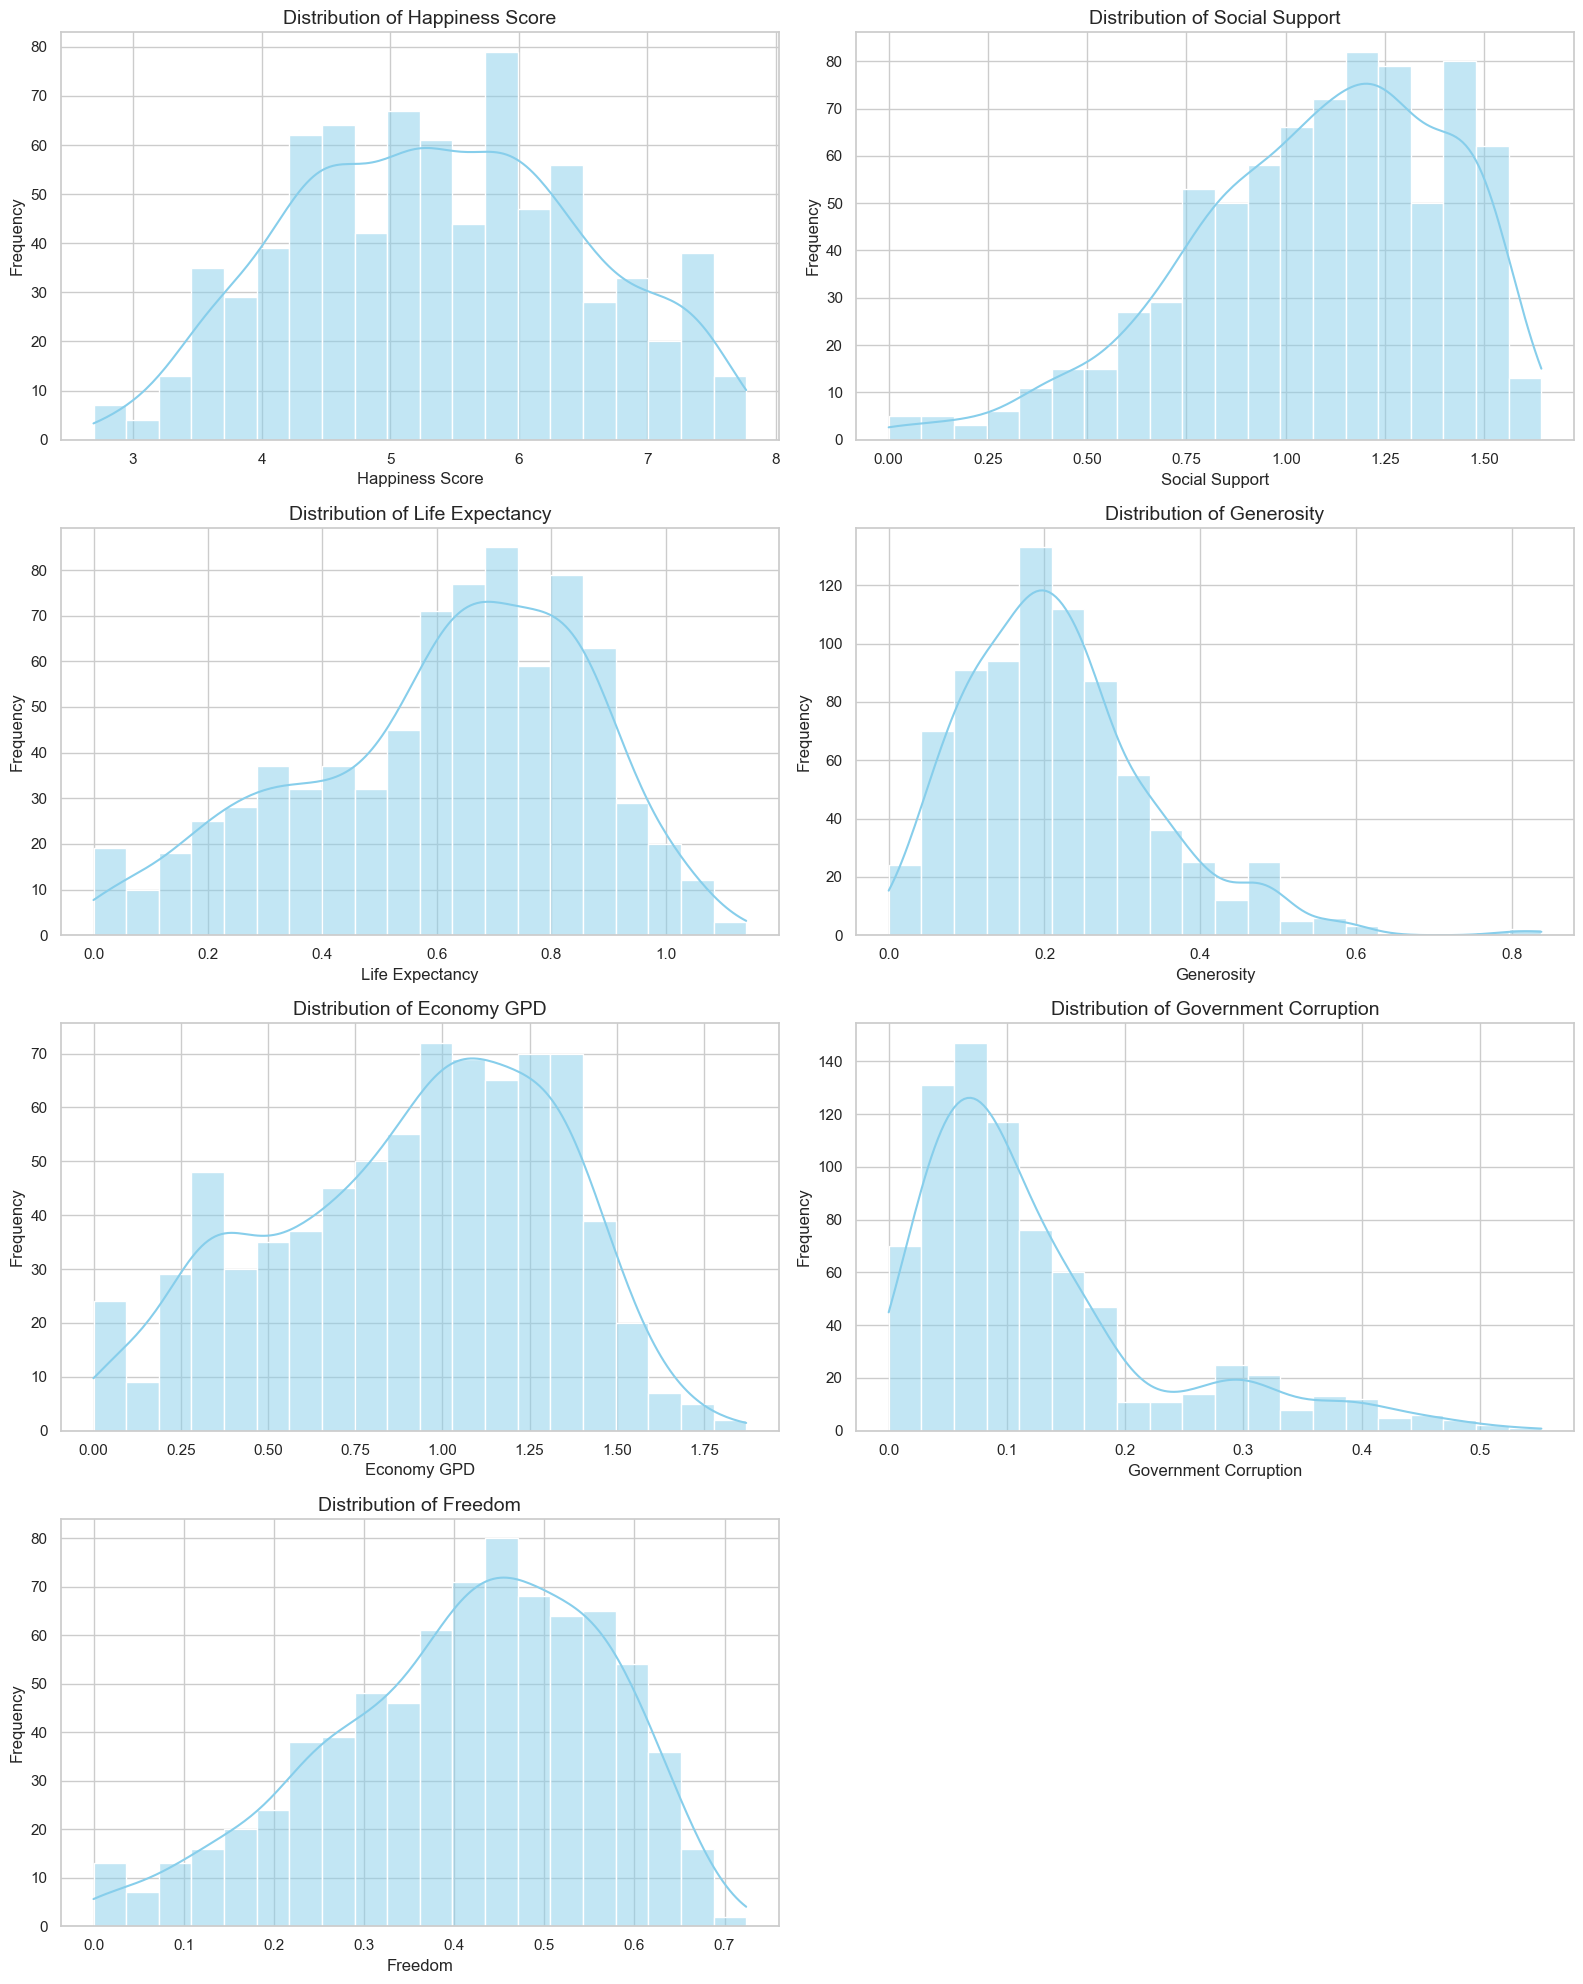

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set(style="whitegrid")

# List of key variables for univariate analysis
key_variables = [
    "Happiness Score",
    "Social Support",
    "Life Expectancy",
    "Generosity",
    "Economy GPD",
    "Government Corruption",
    "Freedom"
]

# Plot distributions for each key variable
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(key_variables):
    sns.histplot(data[var], kde=True, bins=20, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Hide any unused subplot axes
for j in range(len(key_variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


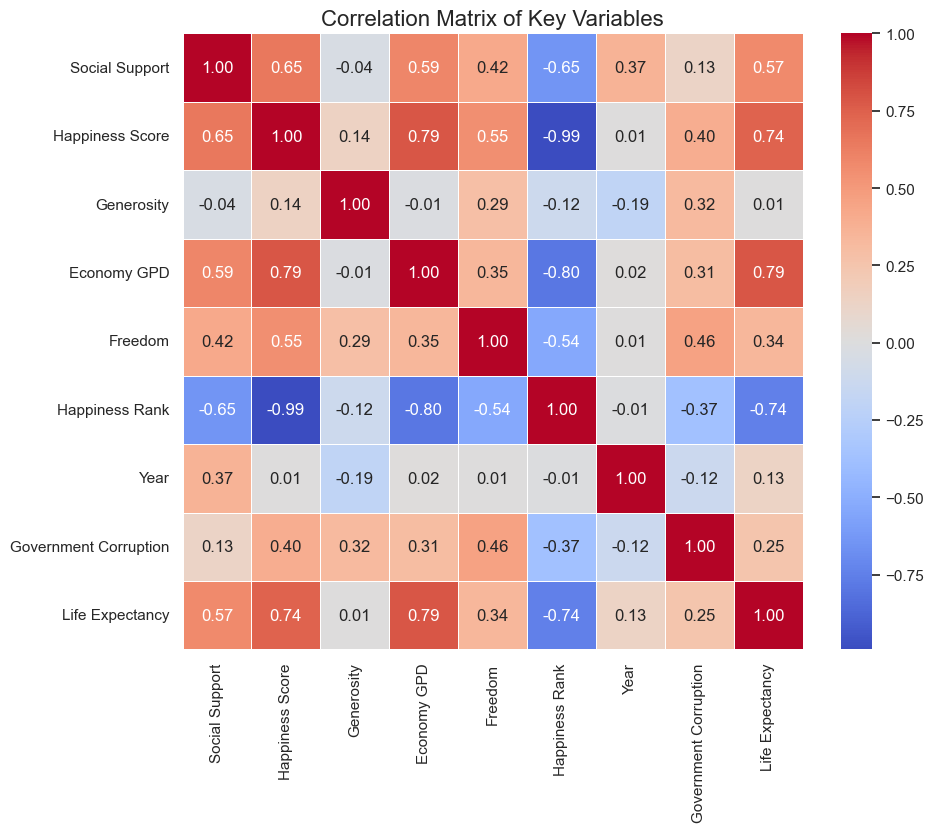

In [50]:
# Re-importing required libraries to ensure they are correctly loaded
import matplotlib.pyplot as plt
import seaborn as sns

# Recomputing the correlation matrix (handling future warning explicitly)
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.show()


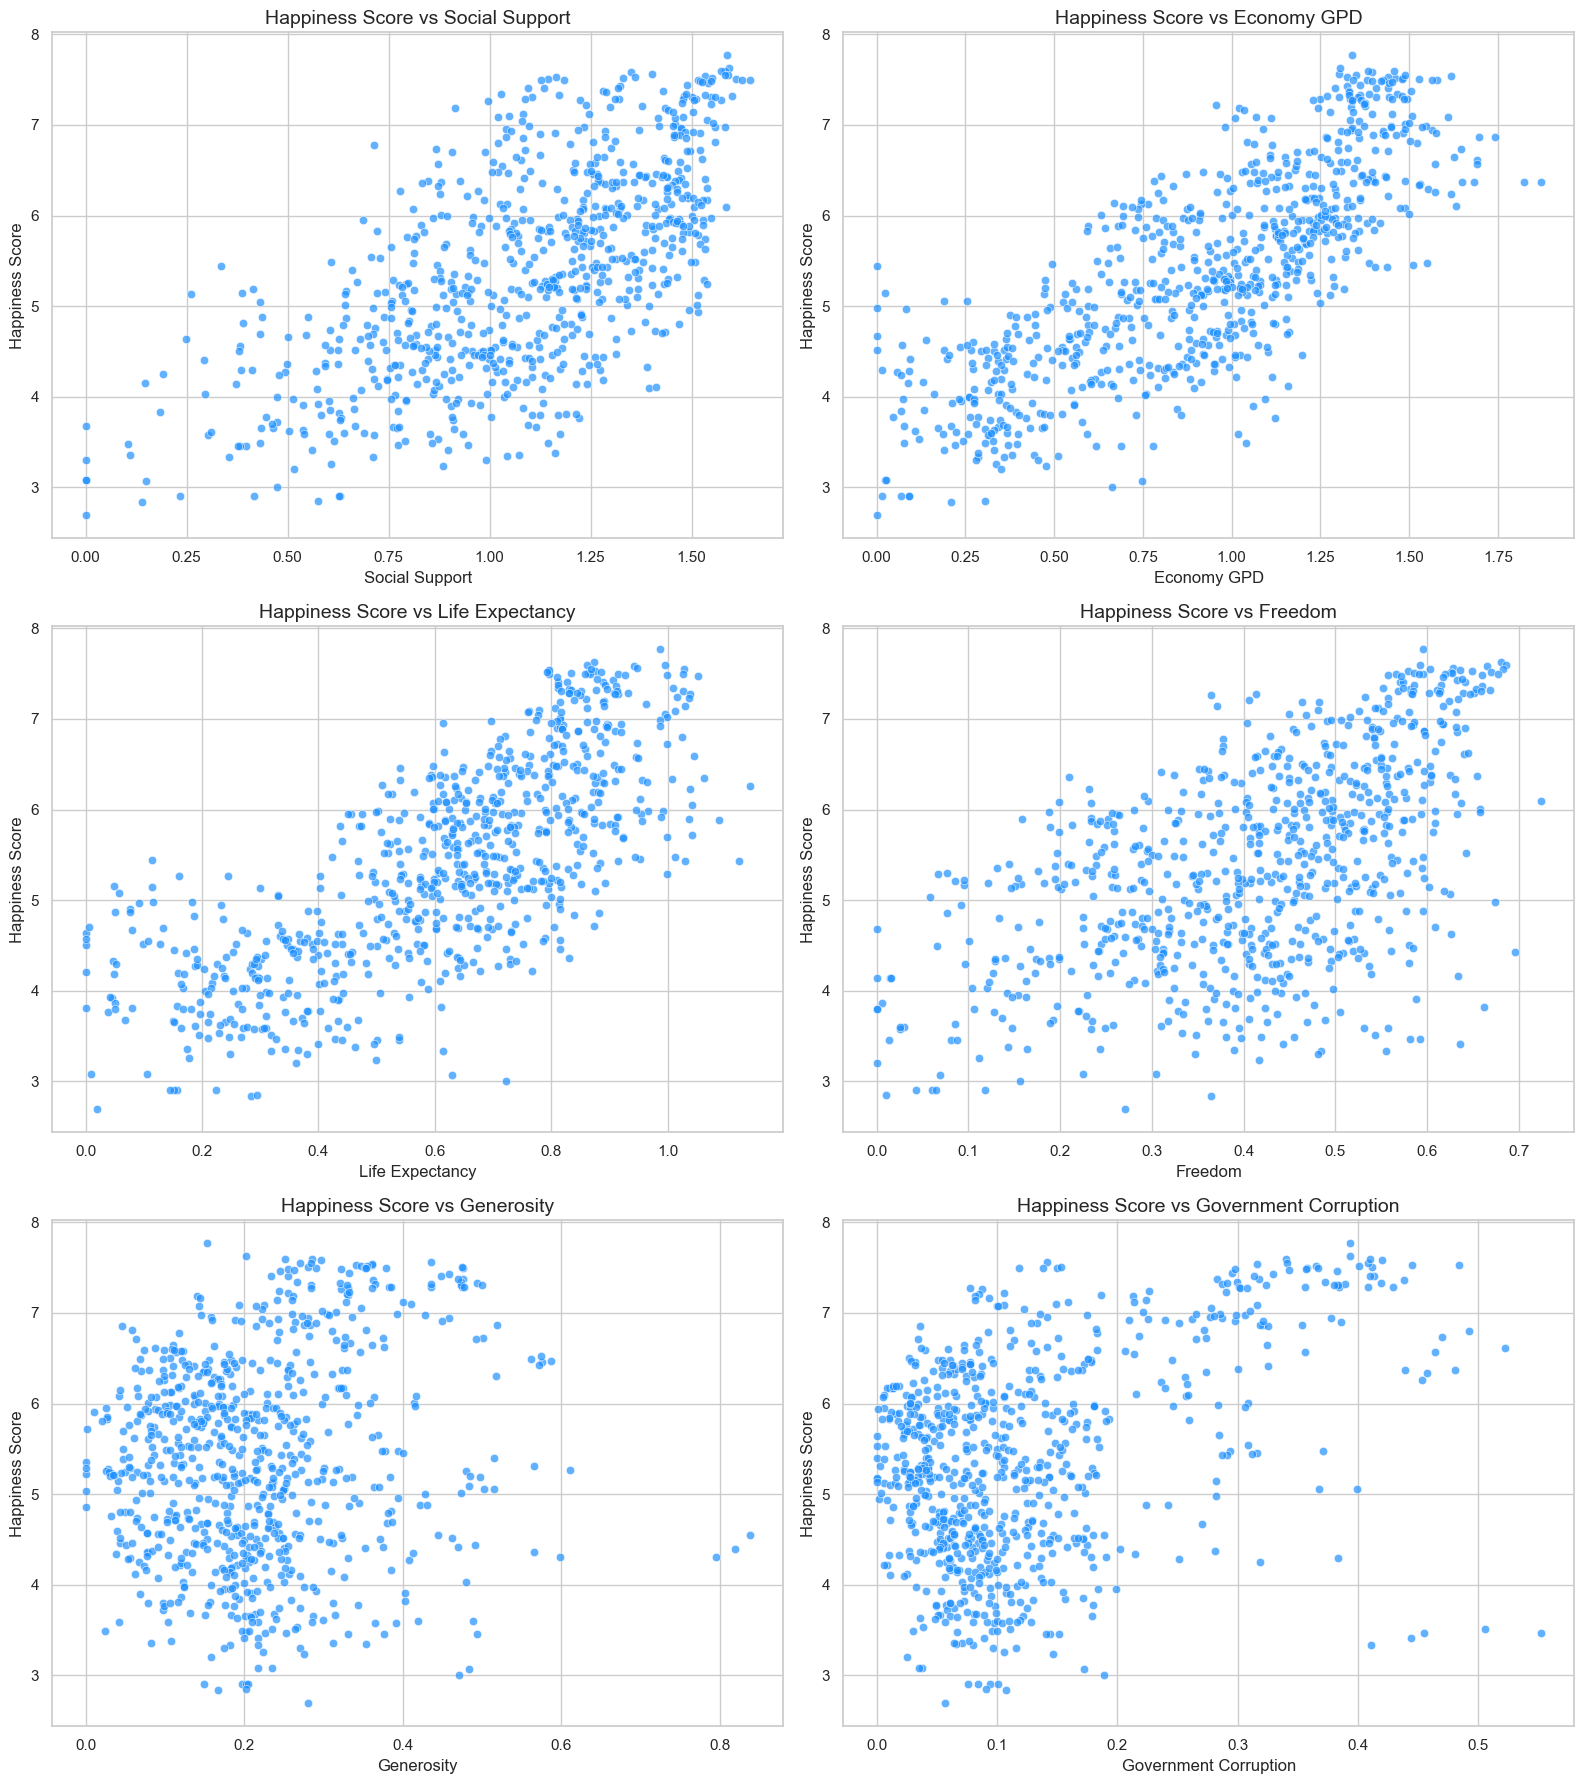

In [51]:
# Scatter plots for Happiness Score vs key variables
key_variables = [
    "Social Support",
    "Economy GPD",
    "Life Expectancy",
    "Freedom",
    "Generosity",
    "Government Corruption"
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
axes = axes.flatten()

# Create scatter plots
for i, var in enumerate(key_variables):
    sns.scatterplot(x=data[var], y=data["Happiness Score"], ax=axes[i], color="dodgerblue", alpha=0.7)
    axes[i].set_title(f"Happiness Score vs {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Happiness Score", fontsize=12)

plt.tight_layout()
plt.show()


In [52]:
print(data.columns)


Index(['Social Support', 'Happiness Score', 'Generosity', 'Economy GPD',
       'Country', 'Freedom', 'Happiness Rank', 'Year', 'Government Corruption',
       'Life Expectancy'],
      dtype='object')


In [55]:
import pandas as pd

# Load the dataset
file_path = '/Users/skye/DL:NLP:CV/Data_Dashboard.csv'  # Adjust the path if necessary
data = pd.read_csv(file_path)

# Check for null or missing values in the dataset
null_counts = data.isnull().sum()

print(null_counts)


Social Support           0
Happiness Score          0
Happiness Rank           0
Year                     0
Country                  0
Life Expectancy          0
Generosity               0
Economy GPD              0
Government Corruption    0
Freedom                  0
Region                   0
dtype: int64


In [57]:

# Afficher les premières lignes et les noms des colonnes
print(data.columns)
print(data.head())


Index(['Social Support', 'Happiness Score', 'Happiness Rank', 'Year',
       'Country', 'Life Expectancy', 'Generosity', 'Economy GPD',
       'Government Corruption', 'Freedom', 'Region'],
      dtype='object')
   Social Support  Happiness Score  Happiness Rank  Year      Country  \
0         1.34951            7.587               1  2015  Switzerland   
1         1.40223            7.561               2  2015      Iceland   
2         1.36058            7.527               3  2015      Denmark   
3         1.33095            7.522               4  2015       Norway   
4         1.32261            7.427               5  2015       Canada   

   Life Expectancy  Generosity  Economy GPD  Government Corruption  Freedom  \
0          0.94143     0.29678      1.39651                0.41978  0.66557   
1          0.94784     0.43630      1.30232                0.14145  0.62877   
2          0.87464     0.34139      1.32548                0.48357  0.64938   
3          0.88521     0.34699   

In [58]:
numeric_cols = ['Happiness Score', 'Social Support', 'Life Expectancy', 'Generosity', 
                'Economy GPD', 'Government Corruption', 'Freedom']

# Compute the correlation matrix
correlation_matrix = filtered_data[numeric_cols].corr()

# Extract the correlation with 'Happiness Score' (excluding itself)
happiness_correlation = correlation_matrix['Happiness Score'].drop('Happiness Score')

# Print the correlation values
print(happiness_correlation)


Social Support           0.359112
Life Expectancy          0.297686
Generosity              -0.301924
Economy GPD             -0.201457
Government Corruption    0.122650
Freedom                  0.182990
Name: Happiness Score, dtype: float64
